# Cimes in Los Angeles

## Assignment

You have been asked to assist the Los Angeles Police Department (LAPD) by analyzing their crime data to identify patterns in criminal behavior. Your insights will help them allocate resources effectively to address different types of crime in various areas.


# Data

The data is publicly available [here](https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8).

## crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2 digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24 hour military time. |
| `'AREA'` | The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. These Geographic Areas are sequentially numbered from 1-21. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Rpt Dist No'` | A four-digit code that represents a sub-area within a Geographic Area. All crime records reference the "RD" that it occurred in for statistical comparisons. Find LAPD Reporting Districts on the LA City GeoHub at http://geohub.lacity.org/datasets/c4f83909b81d4786aa8ba8a74ab |
| `'Crm Cd'` | Crime code for the offence committed. |
| `'Crm Cd Desc'` | Definition of the crime. |
| `'Vict Age'` | Victim Age (years) |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Premis Cd'` | Code for the type of structure, vehicle, or location where the crime took place. |
| `'Premis Desc'` | Definition of the `'Premis Cd'`. |
| `'Weapon Used Cd'` | The type of weapon used in the crime. |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'Crm Cd 1'` | Indicates the crime committed. Crime Code 1 is the primary and most serious one. Crime Code 2, 3, and 4 are respectively less serious offenses. Lower crime class numbers are more serious. |
| `'Crm Cd 2'` | May contain a code for an additional crime, less serious than Crime Code 1. |
| `'Crm Cd 3'` | May contain a code for an additional crime, less serious than Crime Code 1. |
| `'Crm Cd 4'` | May contain a code for an additional crime, less serious than Crime Code 1. |
| `'LOCATION'` | Street address of the crime. |
| `'Cross Street'` | Cross Street of rounded Address |
| `'LAT'` | Latitude of the crime location. |
| `'LON'` | Longtitude of the crime location. |

# Inspecting the Dataset

Python was used to conduct the following analysis. Several libraries were imported, including pandas, numpy, matplotlib and seaborn; as well as the `crimes.csv` dataset provided by the LAPD. The following table provides a quick preview of the information that will be analyzed.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crimes = pd.read_csv("data/crimes.csv")
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,201223780,2020-11-02,11/02/2020 12:00:00 AM,1120,12,77th Street,1256,210,ROBBERY,65,F,H,102.0,SIDEWALK,204.0,FOLDING KNIFE,Invest Cont,210.0,NaN,NaN,NaN,73RD ST,FIGUEROA ST,33.9737,-118.2827
1,201911283,2020-06-23,06/23/2020 12:00:00 AM,315,19,Mission,1958,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",51,M,O,210.0,RESTAURANT/FAST FOOD,NaN,NaN,Invest Cont,740.0,998.0,NaN,NaN,9700 WOODMAN AV,NaN,34.2467,-118.4479
2,200806654,2020-02-28,02/28/2020 12:00:00 AM,1545,8,West LA,885,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),38,F,W,108.0,PARKING LOT,NaN,NaN,Invest Cont,420.0,NaN,NaN,NaN,10400 W PICO BL,NaN,34.0463,-118.4171
3,220912167,2022-08-03,07/26/2022 12:00:00 AM,1730,9,Van Nuys,955,901,VIOLATION OF RESTRAINING ORDER,64,M,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,Adult Other,901.0,NaN,NaN,NaN,14200 MAGNOLIA BL,NaN,34.1668,-118.4445
4,200817110,2020-12-02,11/27/2020 12:00:00 AM,1500,8,West LA,802,662,"BUNCO, GRAND THEFT",73,F,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,Invest Cont,662.0,NaN,NaN,NaN,15000 W SUNSET BL,NaN,34.0889,-118.5325


The objective of the analysis will be to supply the LAPD with general information on the crimes that have occurred in Los Angeles (LAX). 

# Data Validation

The first step of the project was to conduct a general validation of the data to determine if it required cleaning or processing, and to gain an understanding of the available information.

In [3]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400146 entries, 0 to 400145
Data columns (total 25 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           400146 non-null  int64  
 1   Date Rptd       400146 non-null  object 
 2   DATE OCC        400146 non-null  object 
 3   TIME OCC        400146 non-null  int64  
 4   AREA            400146 non-null  int64  
 5   AREA NAME       400146 non-null  object 
 6   Rpt Dist No     400146 non-null  int64  
 7   Crm Cd          400146 non-null  int64  
 8   Crm Cd Desc     400146 non-null  object 
 9   Vict Age        400146 non-null  int64  
 10  Vict Sex        346271 non-null  object 
 11  Vict Descent    346268 non-null  object 
 12  Premis Cd       400140 non-null  float64
 13  Premis Desc     399910 non-null  object 
 14  Weapon Used Cd  136027 non-null  float64
 15  Weapon Desc     136027 non-null  object 
 16  Status Desc     400146 non-null  object 
 17  Crm Cd 1  

The raw dataset consists of 400,146 observations and 25 columns. While most columns have complete data, 11 columns contain some null values. Before conducting the analysis, a detailed inspection of each column was performed to assess:

- Possible values for each attribute.
- If the information and data types align with the specified criteria.
- Any necessary cleaning, transformation, or preparation required for analysis.
- Procedures for handling missing data.

## Validation per Column

1. DR_NO: The dataset contains 400,146 unique file numbers, indicating each row represents a distinct case.
2. Date Rptd: This column was incorrectly imported as a different data type; it was changed to datetime format. It includes data from January 1, 2020, to July 3, 2023, covering 1,279 days.
3. DATE OCC: This column was also converted to datetime and shares the same date range as Date Rptd.
4. TIME OCC: This column is correctly formatted to represent hours and minutes (HH
). It was converted to datetime for clarity.
5. AREA: Contains 21 unique integer values.
6. AREA NAME: Matches the AREA codes with 21 unique values, all properly defined with no need for standardization.
7. Rpt Dist No: Contains 1,171 integer codes, as expected.
8. Crm Cd: Represents 112 different crime types recorded during the observed period.
9. Crm Cd Desc: Contains 112 corresponding crime definitions.
10. Vict Age: Victim ages range from -2 to 120, with negative values deemed erroneous. A total of 32 observations were excluded from the analysis.
11. Vict Sex: Possible values are 'M', 'F', 'X', and 'H'. The 'H' values were standardized to 'X', and null values (53,875 records) were also assigned to 'X'.
12. Vict Descent: Values marked as 'nan' or '-' were standardized to 'X' for unknown descent, with other values conforming to the provided table.
13. Premis Cd: Includes 302 codes for various locations or structures where crimes occurred.
14. Premis Desc: Contains 299 descriptions, indicating that three Premis Cd values (418, 256, and 972) lack associated descriptions.
15. Weapon Used Cd: There were 77 types of weapons identified in LAX crimes during the observation period.
16. Weapon Desc: Matches the 77 weapon types with corresponding descriptions.
17. Status Desc: Six possible statuses reported by LAPD include Invest Cont, Adult Arrest, Adult Other, Juv Arrest, Juv Other, and UNK (Unknown).
18. Crm Cd 1, 2, 3 and 4: These columns detail crimes committed by offenders. Some entries in Crm Cd 2 and Crm Cd 3 are null due to the absence of additional crimes, while all entries in Crm Cd 4 are null and will be excluded from analysis.
19. Location: All crimes have a recorded location.
20. Cross street: This column has over 250,000 null values and will not be included in the analysis.

After validating and cleaning the data, 400,114 observations were retained.

In [4]:
crimes['DR_NO'].nunique()

400146

In [5]:
# Max and min dates in dataset
print(crimes['Date Rptd'].max())
print(crimes['Date Rptd'].min())

# Changing datatype
crimes['Date Rptd'] = pd.to_datetime(crimes['Date Rptd'])
crimes['Date Rptd'].max() - crimes['Date Rptd'].min()

2023-07-03
2020-01-01


Timedelta('1279 days 00:00:00')

In [6]:
# Changing datatype
crimes['DATE OCC']= pd.to_datetime(crimes['DATE OCC'])
print(crimes['DATE OCC'].max())
print(crimes['DATE OCC'].min())
crimes['DATE OCC'].max() - crimes['DATE OCC'].min()

2023-07-03 00:00:00
2020-01-01 00:00:00


Timedelta('1279 days 00:00:00')

In [7]:
crimes['TIME OCC'].value_counts().reset_index(name = 'count').sort_values('index')

,index,count
13,1,6452
294,2,85
296,3,80
300,4,69
47,5,1350
...,...,...
155,2355,513
1124,2356,21
719,2357,31
664,2358,32


In [8]:
crimes['AREA'].nunique()

21

In [9]:
crimes['AREA NAME'].nunique
crimes['AREA NAME'].value_counts()

Central        26996
77th Street    25147
Pacific        23267
Southwest      22284
Hollywood      21373
Southeast      20596
Olympic        20298
Newton         19966
N Hollywood    19924
Wilshire       18813
Rampart        18603
West LA        18444
Northeast      17458
Van Nuys       16970
West Valley    16833
Harbor         16445
Devonshire     16249
Topanga        16173
Mission        15745
Hollenbeck     15135
Foothill       13427
Name: AREA NAME, dtype: int64

In [10]:
display(crimes['Rpt Dist No'].nunique())
crimes['Rpt Dist No'].value_counts().head()

1171

162     2220
645     2030
182     1874
646     1813
1494    1767
Name: Rpt Dist No, dtype: int64

In [11]:
crimes['Crm Cd'].nunique()

112

In [12]:
crimes['Crm Cd Desc'].nunique()

112

In [13]:
crimes['DR_NO'].nunique()

400146

In [14]:
np.sort(crimes['Vict Age'].unique())

array([ -2,  -1,   0,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 120])

In [15]:
crimes[(crimes['Vict Age'] == 0)].count()

DR_NO             99828
Date Rptd         99828
DATE OCC          99828
TIME OCC          99828
AREA              99828
AREA NAME         99828
Rpt Dist No       99828
Crm Cd            99828
Crm Cd Desc       99828
Vict Age          99828
Vict Sex          45971
Vict Descent      45967
Premis Cd         99822
Premis Desc       99688
Weapon Used Cd    11169
Weapon Desc       11169
Status Desc       99828
Crm Cd 1          99824
Crm Cd 2           6289
Crm Cd 3             65
Crm Cd 4              0
LOCATION          99828
Cross Street      15571
LAT               99828
LON               99828
dtype: int64

In [16]:
crimes = crimes[(crimes['Vict Age'] >= 0) & (crimes['Vict Age'] <= 120)]
np.sort(crimes['Vict Age'].unique())

array([  0,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 120])

In [17]:
crimes['Vict Sex'].value_counts()

M    168302
F    143014
X     34872
H        51
Name: Vict Sex, dtype: int64

In [18]:
crimes.loc[crimes['Vict Sex'] == 'H', 'Vict Sex'] = 'X'
crimes['Vict Sex'].value_counts()

M    168302
F    143014
X     34923
Name: Vict Sex, dtype: int64

In [19]:
crimes.loc[crimes['Vict Sex'].isnull(), 'Vict Sex'] = 'X'
crimes['Vict Sex'].value_counts()

M    168302
F    143014
X     88798
Name: Vict Sex, dtype: int64

In [20]:
crimes.loc[crimes['Vict Descent'] == '-', 'Vict Descent'] = 'X'
crimes.loc[crimes['Vict Descent'].isnull(), 'Vict Descent'] = 'X'
np.sort(crimes['Vict Descent'].unique())

array(['A', 'B', 'C', 'D', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'O', 'P',
       'S', 'U', 'V', 'W', 'X', 'Z'], dtype=object)

In [21]:
crimes['Premis Cd'].nunique()

305

In [22]:
crimes['Premis Desc'].nunique()

302

In [23]:
display(np.sort(crimes.groupby('Premis Cd')['Premis Desc'].nunique()))
crimes[crimes['Premis Desc'].isna()]['Premis Cd'].unique()

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

array([256., 418., 972.,  nan])

In [24]:
crimes['Weapon Used Cd'].nunique()

77

In [25]:
crimes['Weapon Desc'].nunique()

77

In [26]:
crimes['Status Desc'].value_counts()

Invest Cont     322930
Adult Other      41272
Adult Arrest     34125
Juv Arrest        1192
Juv Other          593
UNK                  2
Name: Status Desc, dtype: int64

In [27]:
print('Crm Cd 1 - unique values ' + str(crimes['Crm Cd 1'].nunique()))
print('Crm Cd 2 - unique values ' + str(crimes['Crm Cd 2'].nunique()))
print('Crm Cd 3 - unique values ' + str(crimes['Crm Cd 3'].nunique()))
print('Crm Cd 4 - unique values ' + str(crimes['Crm Cd 4'].nunique()))

Crm Cd 1 - unique values 119
Crm Cd 2 - unique values 102
Crm Cd 3 - unique values 27
Crm Cd 4 - unique values 0


In [28]:
crimes['LOCATION'].isna().sum()

0

In [29]:
crimes['Cross Street'].isna().sum()

335533

In [30]:
crimes['DR_NO'].nunique()

400114

In [31]:
# Cleaning the TIME OCC column

crimes['TIME OCC_String'] = crimes['TIME OCC'].astype('string')

def cleaning_time_values(time):
    if len(time) == 4:
        return time
    else:
        return '0' + time
    
crimes['TIME OCC_Cleaned'] = crimes['TIME OCC_String'].apply(cleaning_time_values)
crimes[['TIME OCC', 'TIME OCC_String', 'TIME OCC_Cleaned']]
crimes['TIME OCC_Cleaned'] = pd.to_datetime(crimes['TIME OCC_Cleaned'], format='%H%M').dt.strftime('%H:%M')
np.sort(crimes['TIME OCC_Cleaned'].unique())

array(['00:01', '00:02', '00:03', ..., '23:57', '23:58', '23:59'],
      dtype=object)

# Data Analysis

## Crimes Throughout Time

The analysis will begin by examining the evolution of crimes over the past years. The following table presents data on the number of crimes reported in LAX since 2020. It is important to note that the data for 2023 is available only up to July 3rd.

In [32]:
# Creating 'year_occ', 'month_occ' and 'day_occ'
crimes['year_occ'] = crimes['DATE OCC'].dt.year
crimes['month_occ'] = crimes['DATE OCC'].dt.month
crimes['day_occ'] = crimes['DATE OCC'].dt.day 
crimes['dayofweek_occ'] = crimes['DATE OCC'].dt.dayofweek

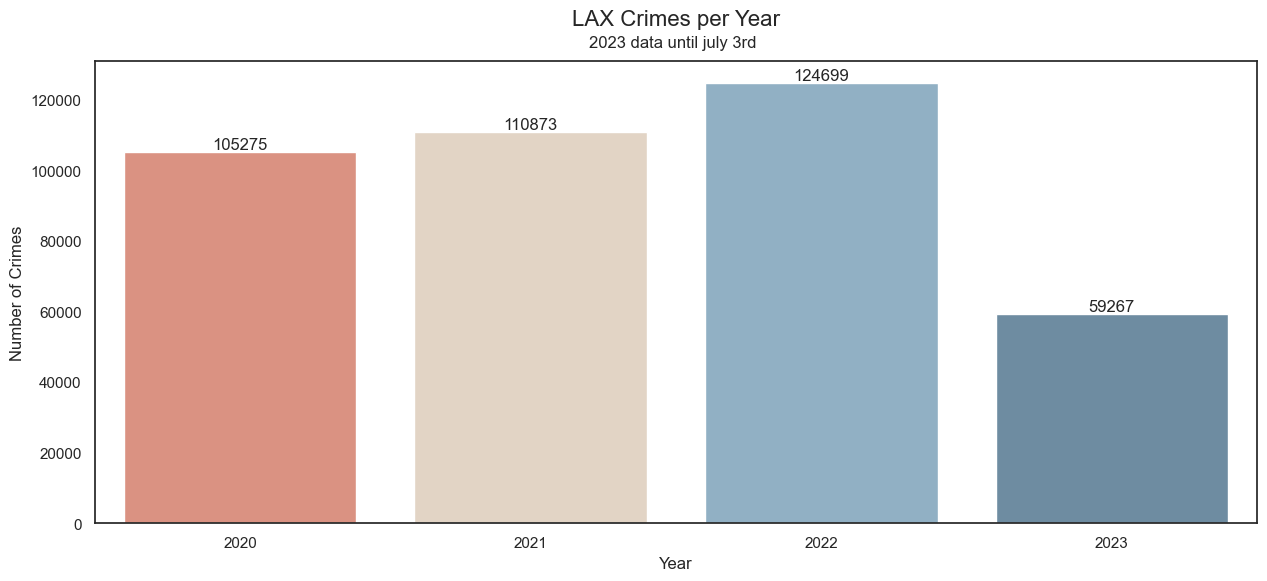

In [33]:
# Crimes per Year
crimes_by_year = crimes.groupby('year_occ')['DR_NO'].count().reset_index()

sns.set_style('white')
sns.set_context('notebook')
plt.figure(figsize = (15, 6))
ax = sns.barplot(data = crimes_by_year, x = 'year_occ', y = 'DR_NO', palette= {2020:'#E98973', 2021:'#E7D4C0', 2022:'#88B2CC', 2023:'#658EA9'})
ax.bar_label(ax.containers[0])
plt.title('LAX Crimes per Year', size = 16, y = 1.06)
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.text(1.20, 135000, '2023 data until july 3rd')
plt.show()

The previous graph indicates a steady increase in crimes in Los Angeles from 2020 to 2022. Based on current figures, forecasts for 2023 suggest that the number of crimes could reach approximately 118,900, showing a slight decline compared to 2022.

In [34]:
crimes[crimes['DATE OCC'] > '2023-07-01'].count()

DR_NO               306
Date Rptd           306
DATE OCC            306
TIME OCC            306
AREA                306
AREA NAME           306
Rpt Dist No         306
Crm Cd              306
Crm Cd Desc         306
Vict Age            306
Vict Sex            306
Vict Descent        306
Premis Cd           306
Premis Desc         306
Weapon Used Cd      149
Weapon Desc         149
Status Desc         306
Crm Cd 1            306
Crm Cd 2             23
Crm Cd 3              1
Crm Cd 4              0
LOCATION            306
Cross Street         59
LAT                 306
LON                 306
TIME OCC_String     306
TIME OCC_Cleaned    306
year_occ            306
month_occ           306
day_occ             306
dayofweek_occ       306
dtype: int64

To conduct a more in-depth analysis, we aimed to identify any specific months when crime rates tend to rise or fall, which could provide insights into seasonality. For this analysis, we will exclude July 2023, as it includes data for only the first three days. Therefore, our focus will be on the period from January 1, 2020, to the end of June 2023.

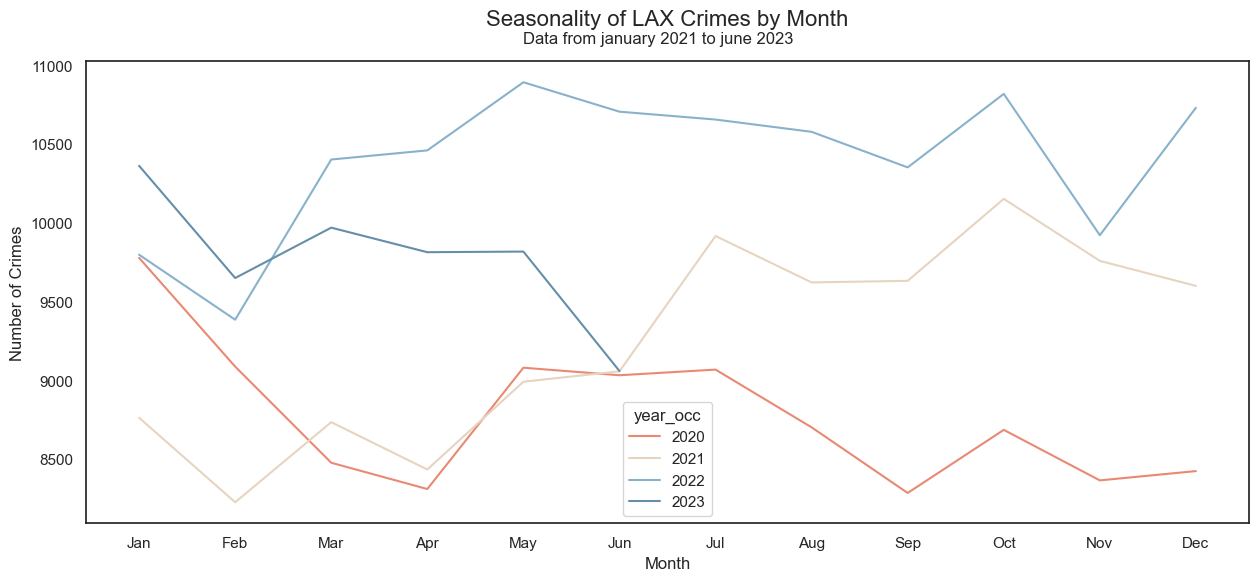

In [35]:
# Crimes per Month/Year
crimes_by_year_month = crimes.groupby(['year_occ', 'month_occ'])['DR_NO'].count().reset_index()
crimes_by_year_month = crimes_by_year_month[~(crimes_by_year_month['year_occ'] == 2023) | ~(crimes_by_year_month['month_occ'] == 7)]
crimes_by_year_month['DR_NO'].sum()

sns.set_style('white')
sns.set_context('notebook')
plt.figure(figsize = (15, 6))
ax = sns.lineplot(data = crimes_by_year_month, x = 'month_occ', y = 'DR_NO', hue = 'year_occ', palette= {2020:'#E98973', 2021:'#E7D4C0', 2022:'#88B2CC', 2023:'#658EA9'})
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Seasonality of LAX Crimes by Month', size = 16, y = 1.06)
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.text(5, 11140, 'Data from january 2021 to june 2023')
plt.show()

The previous line graph indicates observable trends in crime rates throughout the year. Notably, there are slight increases in the number of crimes in January, May, and October, while February and November generally experience lower crime rates.

To further explore seasonality, we will break down the data by day of the week to analyze how crime rates vary.

In [36]:
crimes_by_year_month['DR_NO'].sum()

399515

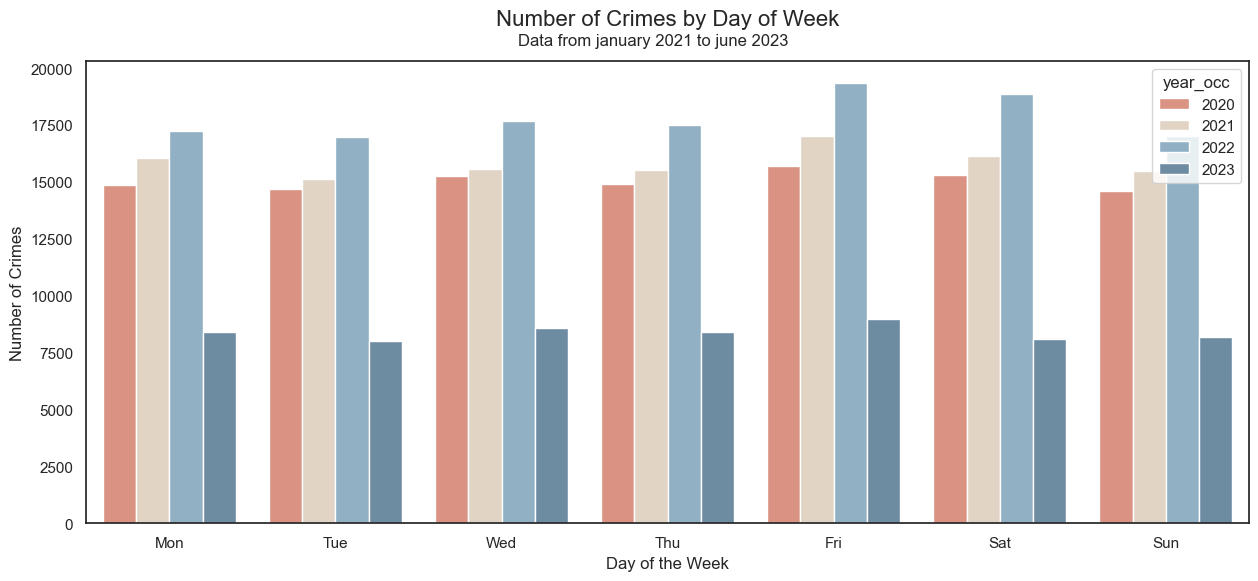

In [37]:
# Crimes by Day of Week
crimes_by_year_month_dow = crimes.groupby(['year_occ', 'month_occ', 'dayofweek_occ'])['DR_NO'].count().reset_index()
crimes_by_year_month_dow = crimes_by_year_month_dow[~(crimes_by_year_month_dow['year_occ'] == 2023) | ~(crimes_by_year_month_dow['month_occ'] == 7)]

sns.set_style('white')
sns.set_context('notebook')
plt.figure(figsize = (15, 6))
ax = sns.barplot(data = crimes_by_year_month_dow, x = 'dayofweek_occ', y = 'DR_NO', hue = 'year_occ', palette= {2020:'#E98973', 2021:'#E7D4C0', 2022:'#88B2CC', 2023:'#658EA9'}, estimator = 'sum', ci = None)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('Number of Crimes by Day of Week', size = 16, y = 1.06)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.text(2.1, 21000, 'Data from january 2021 to june 2023')
plt.show()

The bar plot reveals that, across all observed years, Friday consistently shows slightly higher crime rates in the city. The remaining days of the week exhibit relatively equal crime levels. This information could assist the LAPD in deploying more officers on Fridays to help prevent potential spikes in criminal activity.

Finally, we can also preview how crimes behave at certain times of the day. 

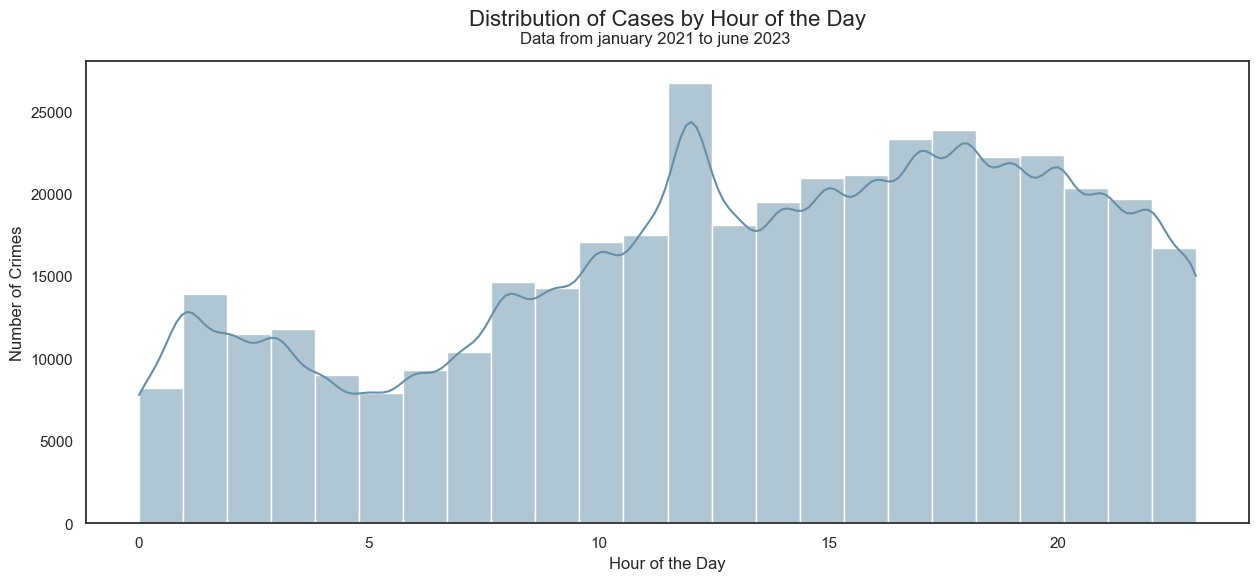

In [60]:
crimes['TIME OCC_Hour'] = pd.to_datetime(crimes['TIME OCC_Cleaned']).dt.hour



sns.set_style('white')
sns.set_context('notebook')
plt.figure(figsize = (15, 6))
sns.histplot(data = crimes, x = 'TIME OCC_Hour', bins = 24, kde = True, color = '#658EA9')
plt.title('Distribution of Cases by Hour of the Day', size = 16, y = 1.06)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crimes')
plt.text(8.3, 29140, 'Data from january 2021 to june 2023')
plt.show()

The previous histogram illustrates that the most common time for crimes to occur is at 12:00 PM. It may be worthwhile to investigate further to confirm that cases without a recorded time are not logged in the LAPD database at that hour. Additionally, the histogram indicates that crime rates tend to increase in the afternoon compared to other times of the day.

## Reporting a Case

An additional information that the LAPD might want to know is how much time it takes on average to report the case from the day the crime occurred. 

In [61]:
crimes['Time to Report'] =  crimes['Date Rptd'] - crimes['DATE OCC']
print(crimes['Time to Report'].mean())

8 days 23:40:57.685559615


On average, it takes nearly 9 days for each crime to be reported. It would be beneficial for the LAPD to investigate the reasons behind this delay, as ideally, this timeframe should be minimized to expedite the resolution and determination of crime cases.

## Crimes by Age and Gender

For this section, we will start by looking at how crimes have behaved across victims' sex. 

In [40]:
crimes['Vict Sex'].value_counts(normalize = True)

M    0.420635
F    0.357433
X    0.221932
Name: Vict Sex, dtype: float64

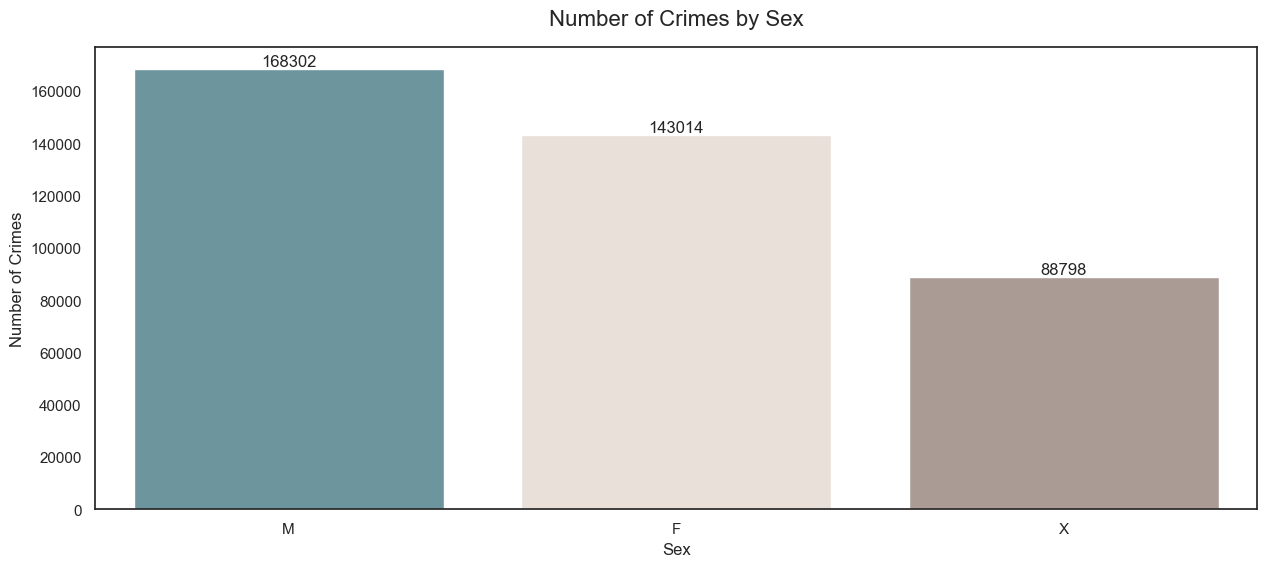

In [41]:
sns.set_style('white')
sns.set_context('notebook')
plt.figure(figsize = (15, 6))
ax = sns.countplot(data = crimes, x = 'Vict Sex', palette= {'F' : '#ece0d6', 'M': '#649ba5', 'X': '#ae9b91'}, order = crimes['Vict Sex'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title('Number of Crimes by Sex', size = 16, y = 1.03)
plt.xlabel('Sex')
plt.ylabel('Number of Crimes')
plt.show()

Of the total crimes recorded in LAX over the entire period, 42% were committed against male victims, 35% against female victims, and the remaining 22% were victims whose sex is not recorded by the LAPD.

The next step for the LAPD is to understand the distribution of age within these genders. 

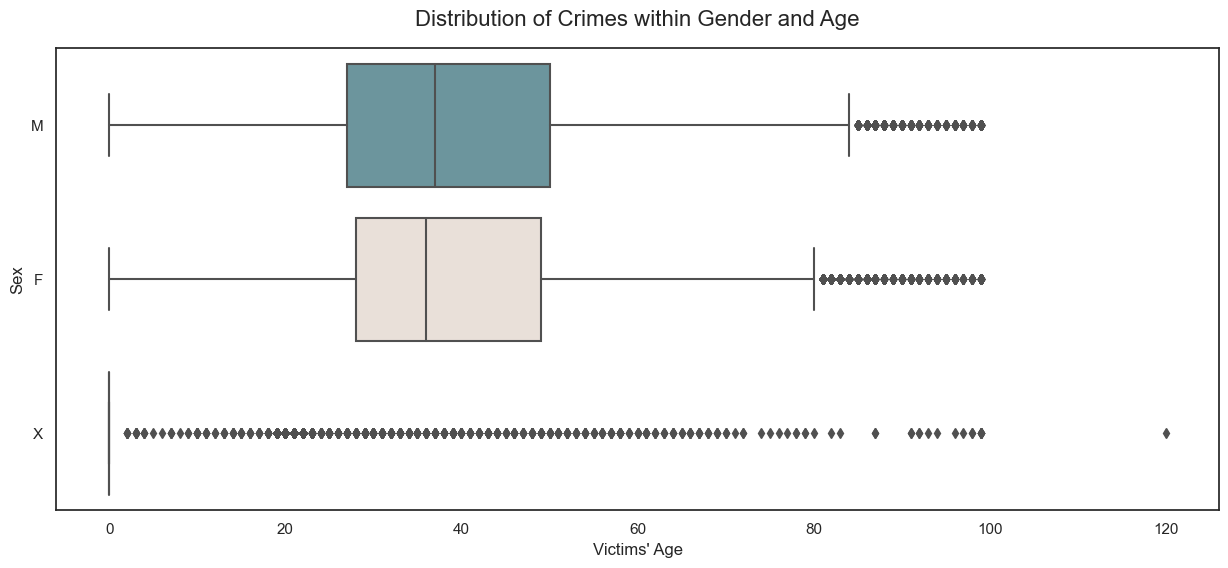

In [42]:
# Crimes by Gender

sns.set_style('white')
sns.set_context('notebook')
plt.figure(figsize = (15, 6))
sns.boxplot(data = crimes, x = 'Vict Age', y = 'Vict Sex', palette= {'F' : '#ece0d6', 'M': '#649ba5', 'X': '#ae9b91'}, order = crimes['Vict Sex'].value_counts().index)
plt.title('Distribution of Crimes within Gender and Age', size = 16, y = 1.03)
plt.xlabel("Victims' Age")
plt.ylabel('Sex')
plt.show()

In [43]:
crimes.groupby('Vict Sex')['Vict Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Vict Sex,,,,,,,,
F,143014.0,39.079622,15.689793,0.0,28.0,36.0,49.0,99.0
M,168302.0,37.886620,18.335679,0.0,27.0,37.0,50.0,99.0
X,88798.0,1.045620,5.453957,0.0,0.0,0.0,0.0,120.0


In [44]:
crimes[crimes['Vict Sex'] == 'X']

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,TIME OCC_String,TIME OCC_Cleaned,year_occ,month_occ,day_occ,dayofweek_occ,TIME OCC_Hour,Time to Report
5,201700058,2020-02-27,2020-02-25,1900,17,Devonshire,1798,510,VEHICLE - STOLEN,0,X,X,101.0,STREET,NaN,NaN,Invest Cont,510.0,NaN,NaN,NaN,8800 HASKELL AV,NaN,34.2302,-118.4764,1900,19:00,2020,2,25,1,19,2 days
13,220809803,2022-05-21,2022-05-21,551,8,West LA,892,510,VEHICLE - STOLEN,0,X,X,108.0,PARKING LOT,NaN,NaN,Invest Cont,510.0,NaN,NaN,NaN,11500 GATEWAY BL,NaN,34.0328,-118.4419,551,05:51,2022,5,21,5,5,0 days
20,211806688,2021-02-23,2021-02-23,1900,18,Southeast,1806,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,X,X,101.0,STREET,NaN,NaN,Invest Cont,420.0,NaN,NaN,NaN,600 E 89TH ST,NaN,33.9556,-118.2651,1900,19:00,2021,2,23,1,19,0 days
29,200414910,2020-11-15,2020-11-15,1810,4,Hollenbeck,466,510,VEHICLE - STOLEN,0,X,X,108.0,PARKING LOT,NaN,NaN,Invest Cont,510.0,NaN,NaN,NaN,200 N FICKETT ST,NaN,34.0434,-118.2068,1810,18:10,2020,11,15,6,18,0 days
30,200908141,2020-04-04,2020-04-02,1730,9,Van Nuys,935,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0,X,X,217.0,AUTO REPAIR SHOP,NaN,NaN,Invest Cont,740.0,NaN,NaN,NaN,14400 VICTORY BL,NaN,34.1867,-118.4465,1730,17:30,2020,4,2,3,17,2 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400127,200605803,2020-02-08,2020-02-06,2000,6,Hollywood,636,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,X,X,101.0,STREET,NaN,NaN,Invest Cont,420.0,NaN,NaN,NaN,1700 N MC CADDEN PL,NaN,34.1016,-118.3374,2000,20:00,2020,2,6,3,20,2 days
400134,211817485,2021-09-26,2021-09-25,2100,18,Southeast,1841,510,VEHICLE - STOLEN,0,X,X,101.0,STREET,NaN,NaN,Invest Cont,510.0,NaN,NaN,NaN,10500 S HOOVER ST,NaN,33.9399,-118.2870,2100,21:00,2021,9,25,5,21,1 days
400135,220818286,2022-12-18,2022-12-18,925,8,West LA,881,310,BURGLARY,0,X,X,702.0,OFFICE BUILDING/OFFICE,NaN,NaN,Invest Cont,310.0,NaN,NaN,NaN,11900 W OLYMPIC BL,NaN,34.0328,-118.4518,925,09:25,2022,12,18,6,9,0 days
400141,201115779,2020-11-16,2020-11-11,1200,11,Northeast,1138,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,X,X,101.0,STREET,NaN,NaN,Invest Cont,420.0,NaN,NaN,NaN,6100 MOUNT ANGELUS DR,NaN,34.1152,-118.1898,1200,12:00,2020,11,11,2,12,5 days


When examining the distribution of male victims ('M'), we find that 50% of cases involve victims aged between 27 and 50, with an average age of 37.8 years.

In the case of female victims ('F'), the average age is approximately 39.0 years, with 50% of cases falling between 28 and 49 years old.

For the 'X' category (unknown gender), most data points have a victim age of 0, which is why the box plot does not display a box like the 'F' and 'M' categories, as it treats all values above 0 as outliers.

It would be important to discuss with the LAPD why many observations in the 'X' gender category show an age of 0, as this could help inform strategies to address these data points.

## Crimes by Descent

Another demographic variable which could help to understand the behavior of crimes to the LAPD is to focus on the victim's desent. 

<Figure size 1500x1500 with 0 Axes>

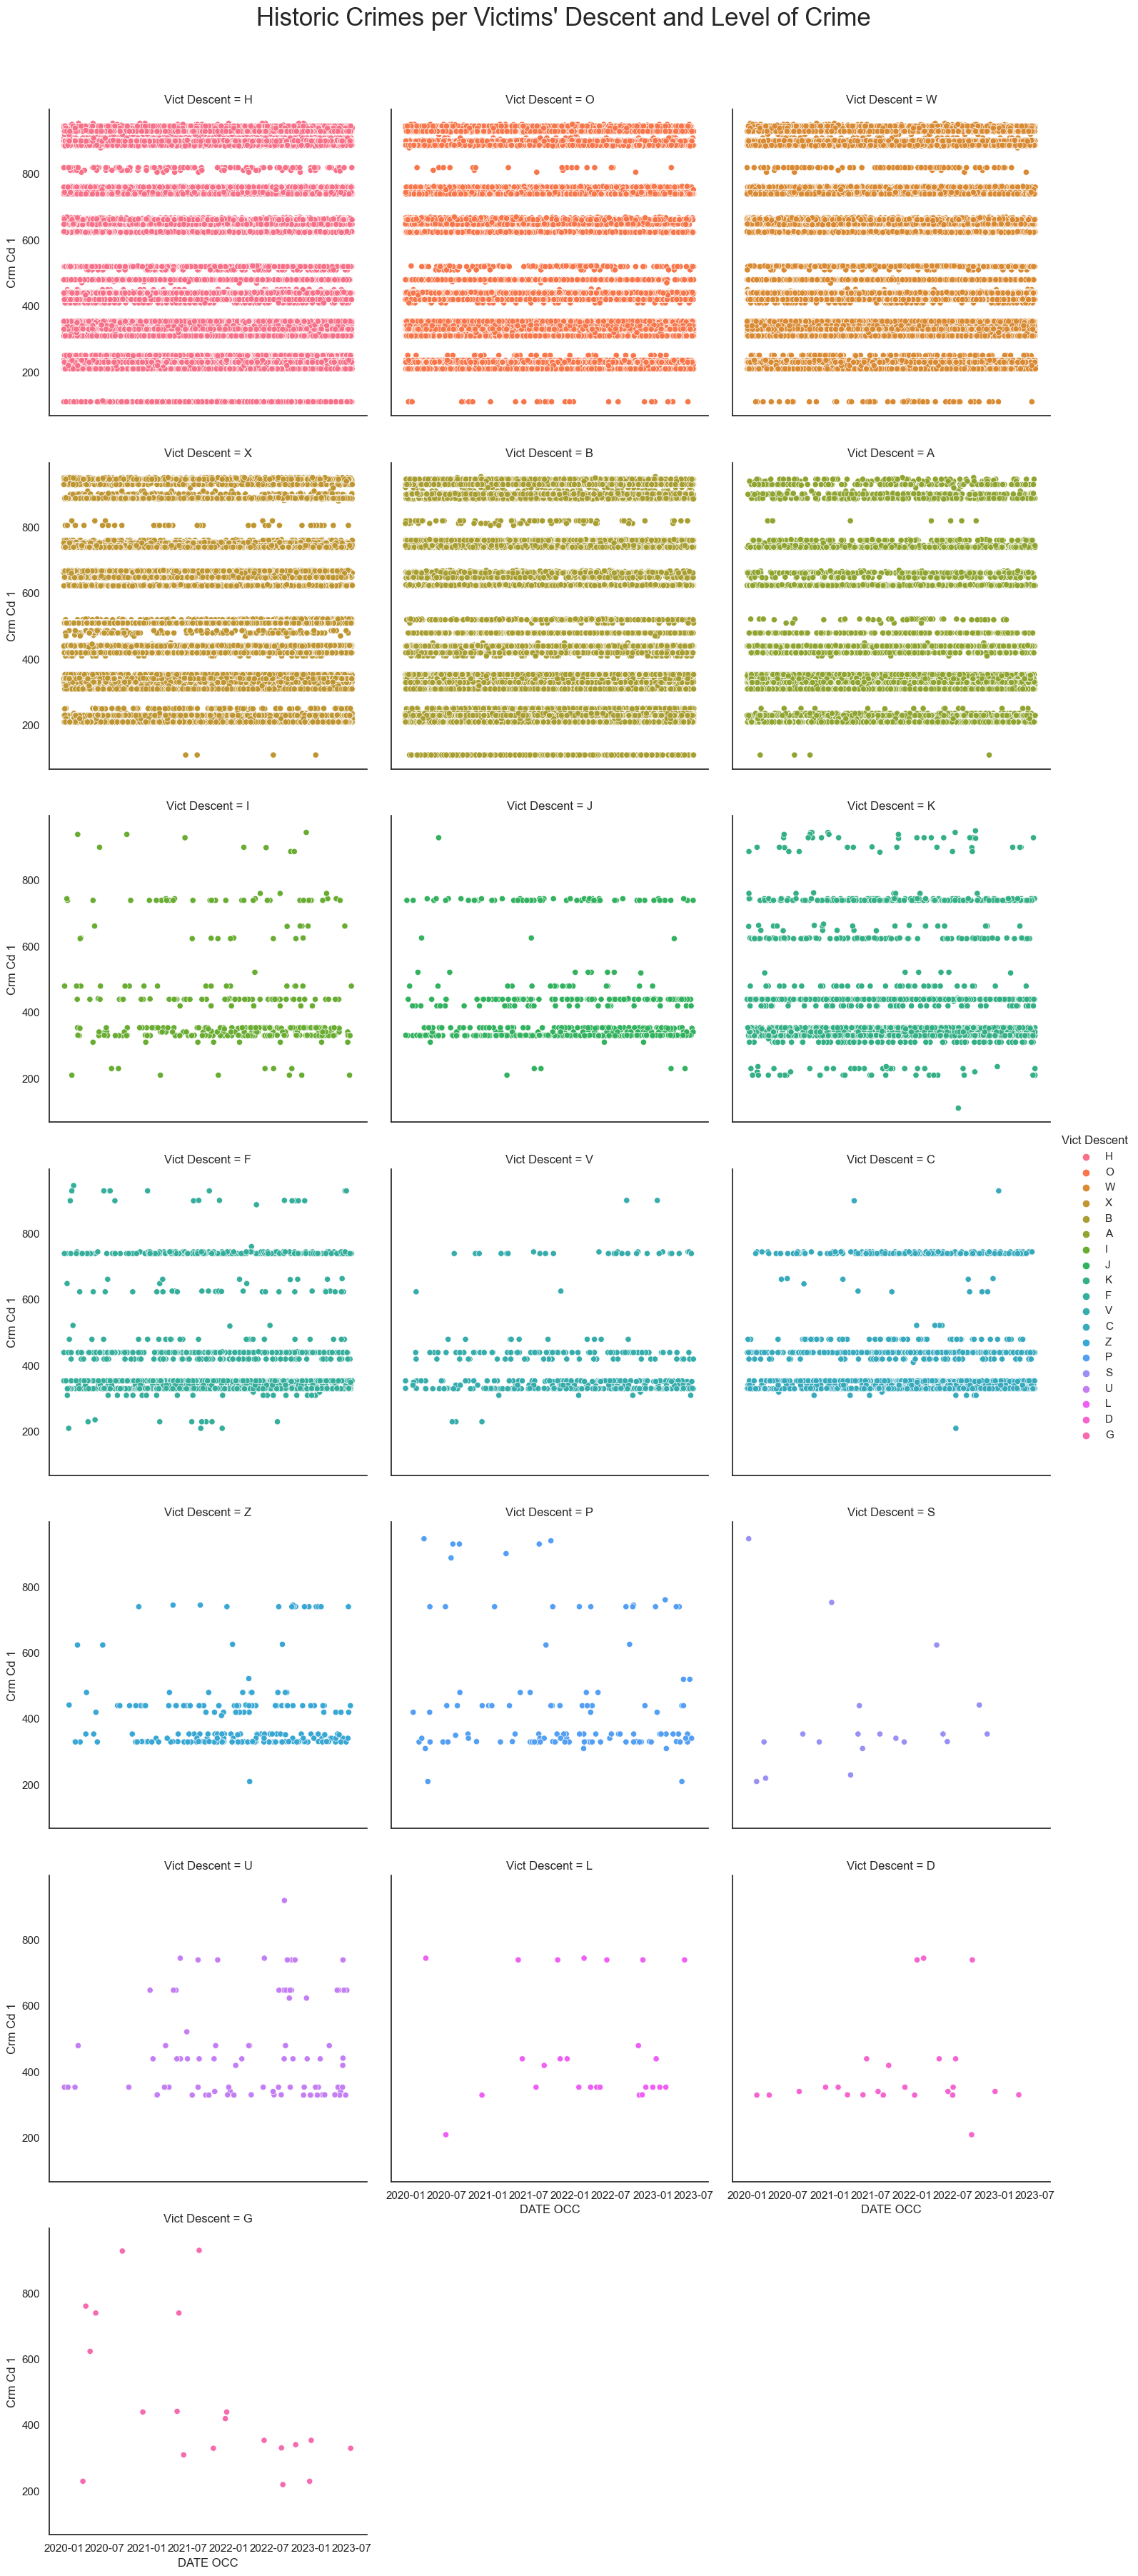

In [45]:
# Historic Crimes per Victims' Descent and Level of Crime
sns.set_style('white')
sns.set_context('notebook')
plt.figure(figsize = (15, 15))
g = sns.relplot(data = crimes, x = 'DATE OCC', y = 'Crm Cd 1', hue = 'Vict Descent', kind = 'scatter', col = 'Vict Descent', col_wrap = 3)
g.fig.suptitle("Historic Crimes per Victims' Descent and Level of Crime", y = 1.03, size = 25)
plt.show()

The previous scatterplots indicate that the victim descent with the highest number of cases is 'H', representing Hispanic/Latin/Mexican individuals, followed by 'O' (Other) and 'W' (White). In contrast, the lowest number of cases are found among 'G' (Guamanian), 'D' (Cambodian), and 'L' (Laotian) victims.

According to LAPD data, lower crime class numbers indicate more serious offenses. Consequently, it is evident that 'H' (Hispanic/Latin/Mexican), 'B' (Black), 'O' (Other), and 'W' (White) are the descents with the highest incidence of serious crimes.

This trend may be attributed to two potential factors:

1. A higher concentration of individuals from these backgrounds living or visiting Los Angeles, increasing the likelihood of crimes affecting that demographic.
2. Possible racial bias against specific ethnic groups, which may contribute to the disproportionate targeting of crimes toward those descents.

## Most Serious Crime Committed

which is the most serios crime committed to victims? 

In [46]:
crimes['Crm Cd 1'].min()
crimes[crimes['Crm Cd 1'] == 110][['Crm Cd 1', 'Crm Cd Desc']][:1]

,Crm Cd 1,Crm Cd Desc
262,110.0,CRIMINAL HOMICIDE


We observe that crime number 110, representing 'Criminal Homicide', is classified as the most serious offense. We will delve deeper into this specific crime code to analyze how cases have varied over time across different victim descents.

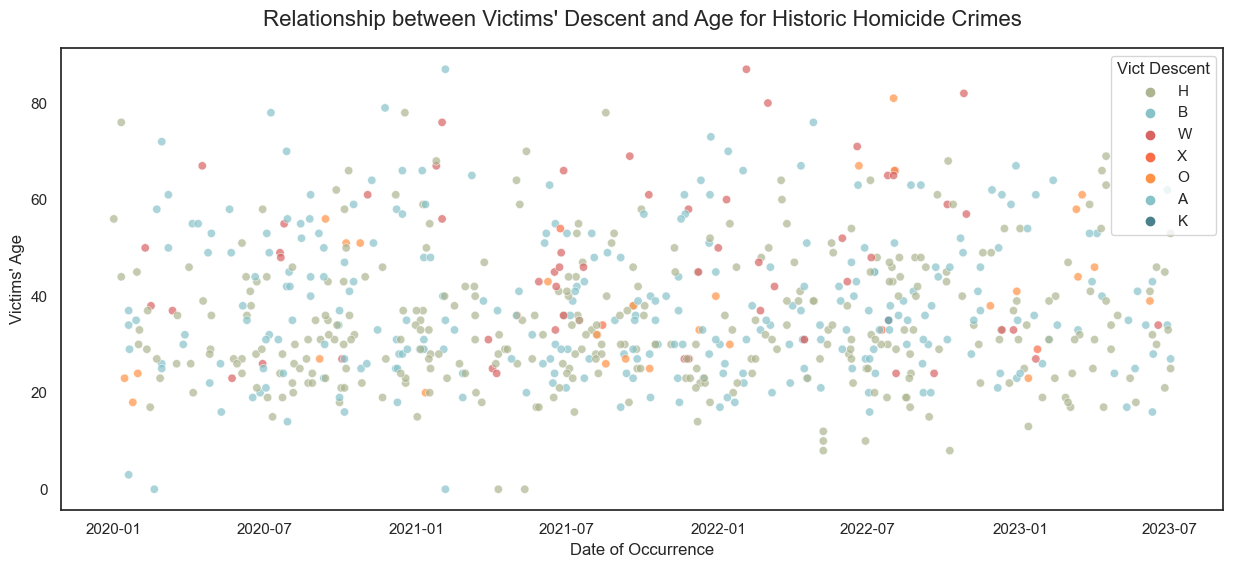

In [47]:
# Previewing homicide crimes across time, considering age and victims' descent. 
homicide_crimes = crimes[crimes['Crm Cd 1'] == 110]

sns.set_style('white')
sns.set_context('notebook')
plt.figure(figsize = (15, 6))
sns.scatterplot(data = homicide_crimes, x = 'DATE OCC', y ='Vict Age', hue = 'Vict Descent', alpha = 0.7, palette= {'H' : '#acb590', 'B' : '#87c3c9', 'W' : '#d86363', 'X' : '#fa6d48', 'O' : '#ff9244', 'A': '#87c3c9', 'K': '#4a818c'})
plt.title("Relationship between Victims' Descent and Age for Historic Homicide Crimes", size = 16, y = 1.03)
plt.xlabel("Date of Occurrence")
plt.ylabel("Victims' Age")
plt.show()

In [48]:
homicide_crimes.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON,year_occ,month_occ,day_occ,dayofweek_occ,TIME OCC_Hour,Time to Report
count,7.050000e+02,705.000000,705.000000,705.000000,705.0,705.000000,705.000000,705.000000,705.0,352.000000,6.000000,0.0,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705
mean,2.136792e+08,1256.029787,10.716312,1118.408511,110.0,37.123404,205.851064,164.286525,110.0,979.840909,924.333333,NaN,33.989744,-118.142471,2021.252482,6.432624,14.990071,3.144681,12.458156,3 days 21:12:30.638297872
std,9.696502e+06,779.261843,6.133837,610.077424,0.0,14.794917,186.208008,116.005609,0.0,113.147851,140.287799,NaN,1.286483,4.456743,0.961664,3.358979,8.699279,2.077081,7.558392,29 days 05:18:06.433377052
min,2.001010e+08,1.000000,1.000000,111.000000,110.0,0.000000,101.000000,101.000000,110.0,210.000000,648.000000,NaN,0.000000,-118.641800,2020.000000,1.000000,1.000000,0.000000,0.000000,0 days 00:00:00
25%,2.020068e+08,435.000000,4.000000,497.000000,110.0,26.000000,101.000000,102.000000,110.0,998.000000,929.000000,NaN,33.973700,-118.330600,2020.000000,4.000000,8.000000,1.000000,5.000000,0 days 00:00:00
50%,2.115138e+08,1418.000000,12.000000,1249.000000,110.0,34.000000,102.000000,106.000000,110.0,998.000000,998.000000,NaN,34.028900,-118.282700,2021.000000,7.000000,14.000000,3.000000,14.000000,0 days 00:00:00
75%,2.212235e+08,1945.000000,16.000000,1656.000000,110.0,46.000000,203.000000,200.000000,110.0,998.000000,998.000000,NaN,34.083700,-118.256000,2022.000000,9.000000,23.000000,5.000000,19.000000,0 days 00:00:00
max,2.321089e+08,2356.000000,21.000000,2189.000000,110.0,87.000000,962.000000,511.000000,110.0,998.000000,998.000000,NaN,34.323000,0.000000,2023.000000,12.000000,31.000000,6.000000,23.000000,437 days 00:00:00


The previous scatterplot reconfirms that the majority of homicides, as mentioned before, are commited to 'H' (Hispanic/Latin/Mexican), 'B' (Black), 'W' ('White') and 'O' (Other). In addition, 50% of these cases fall within the range of ages of 26 and 46 years old.

## Crimes by Area and Status

Having analyzed crime patterns by gender, age, and victim descent, we can now provide an overview of how crimes have varied across the different areas of LAX.

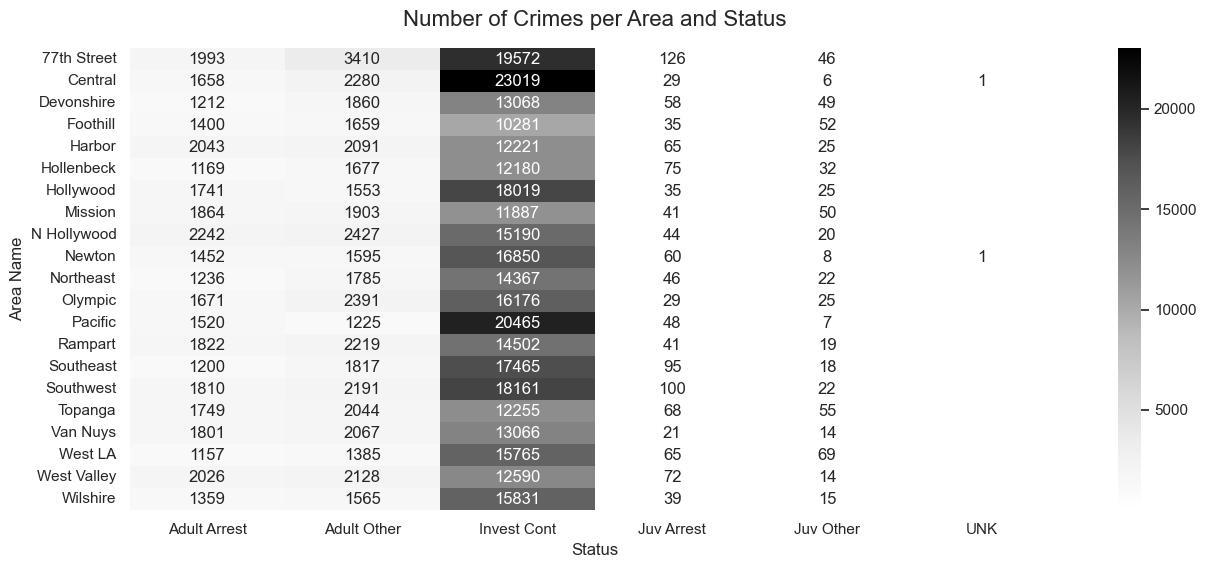

In [62]:
# Crimes by Area 

crimes_by_area = crimes.groupby(['AREA NAME', 'Status Desc'])['DR_NO'].count().reset_index()
crimes_by_area_weapon = crimes_by_area.pivot(index = 'AREA NAME', columns = 'Status Desc', values = 'DR_NO')


sns.set_style('white')
sns.set_context('notebook')
plt.figure(figsize = (15, 6))
sns.heatmap(crimes_by_area_weapon, annot = True, fmt='.0f', cmap= 'Greys')
plt.title('Number of Crimes per Area and Status', size = 16, y = 1.03)
plt.xlabel("Status")
plt.ylabel('Area Name')
plt.show()

The area with the highest number of crimes during the observed period is 77th Street, followed by Central, Debonshire, and Foothill. Conversely, the areas with the fewest crimes include Wilshire, West Valley, West LA, and Van Nuys.

This information is important for the LAPD to consider when deploying officers throughout the city, as it may be beneficial to allocate more personnel to areas with higher crime rates.

Additionally, most crimes are categorized as 'Invest Cont', indicating that investigations are still open and have not yet determined whether the case involves an adult or juvenile arrest, or other forms of punishment. Given the high number of open cases, the LAPD might also consider increasing personnel to help resolve these investigations, provided resources allow.

To further examine how these cases are distributed across LAX, the following section presents a map detailing incidents that have occurred by area during the observed period.

## Most Used Weapon

Another important aspect for the LAPD to consider is identifying the most commonly used weapons in crimes. Understanding this information will help them prepare for potential confrontations with criminals. The following pie chart displays the top 5 weapons used during the observed years.

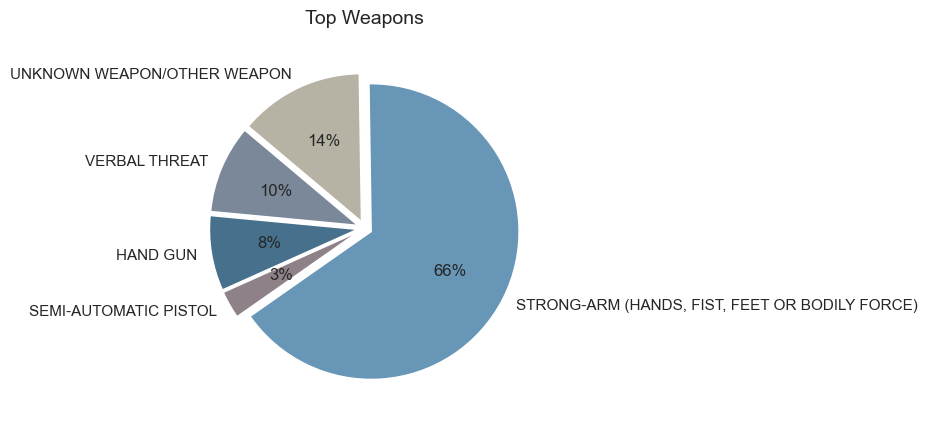

In [50]:
top_weapons = crimes['Weapon Desc'].value_counts(normalize = True).reset_index(name = 'percent')[:5]

# Creating a pie plot
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
colors = ['#6896b6', '#b6b2a4', '#7b8899', '#46708c', '#8f8188']

sns.set_style('white')
sns.set_context('notebook')
ax = plt.pie(top_weapons['percent'], labels = top_weapons['index'], autopct='%.0f%%', explode = explode, colors = colors, startangle = 215)
plt.title('Top Weapons', y = 1.03, size = 14)
plt.show()


Focusing solely on the data regarding the top weapons, we see that most incidents involve hands, fists, feet, or bodily force. However, there are also other weapon types, such as handguns and semi-automatic pistols, that could pose a threat to the LAPD while managing these cases. It is crucial for the LAPD to be fully prepared for any situation that may arise.

## Locations with the Highest Crimes

Top 10 locations where crimes have occurred during the observed period. 

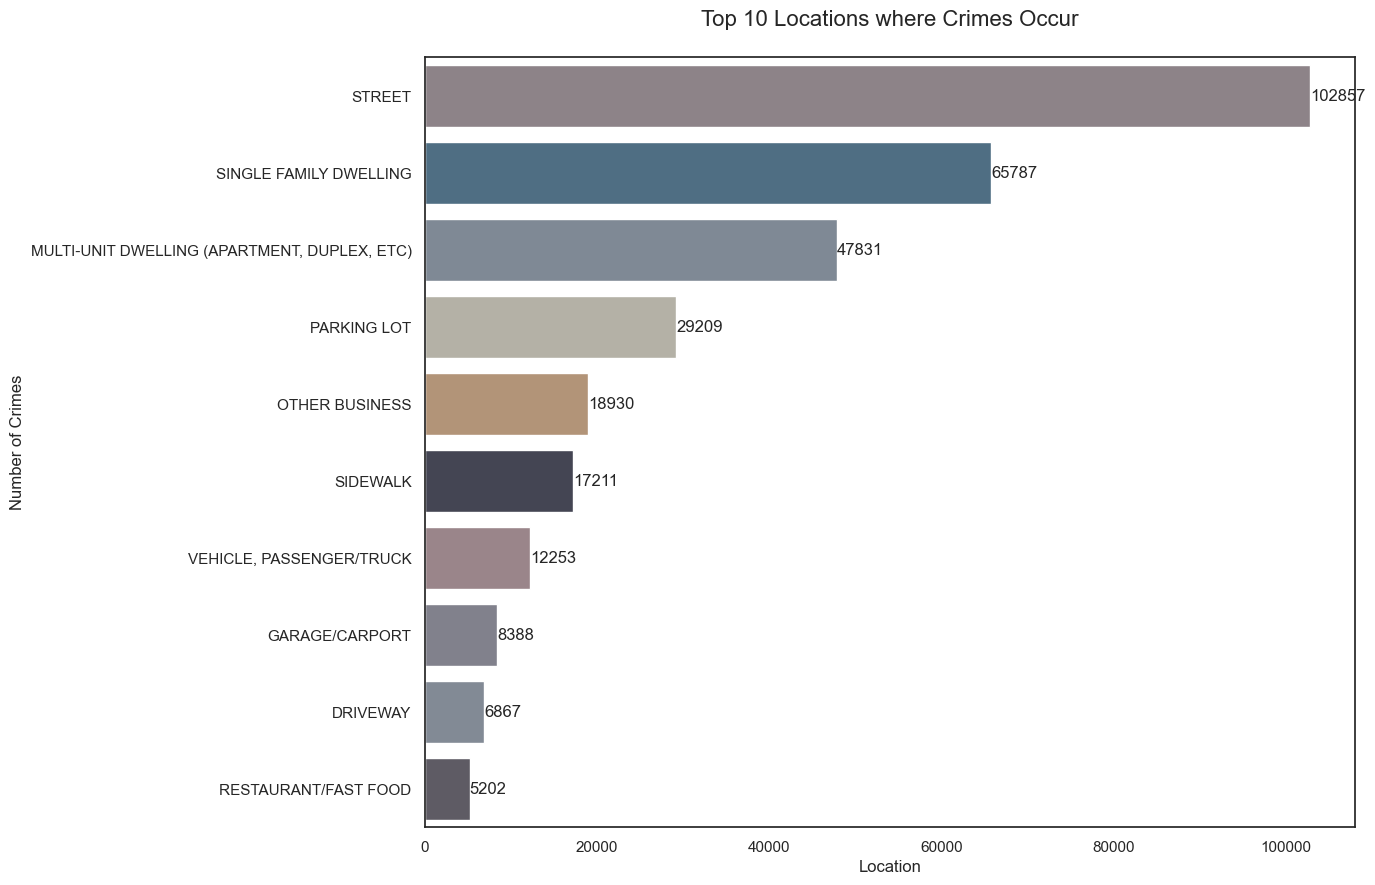

In [51]:
top_locations = crimes['Premis Desc'].value_counts().reset_index(name = 'count')[:10]

sns.set_style('white')
sns.set_context('notebook')
plt.figure(figsize = (12, 10))
ax = sns.barplot(data = top_locations, y = 'index', x = 'count', palette= {'STREET' : '#8f8188', 'SINGLE FAMILY DWELLING' : '#46708c', 'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)' : '#7b8899', 'PARKING LOT' : '#b6b2a4', 'OTHER BUSINESS' : '#bc946e', 'SIDEWALK' : '#414356', 'VEHICLE, PASSENGER/TRUCK' : '#9e8188', 'GARAGE/CARPORT' : '#7f7f8e', 'DRIVEWAY' : '#7f8a98', 'RESTAURANT/FAST FOOD' : '#5d5a65'})
ax.bar_label(ax.containers[0])
plt.title('Top 10 Locations where Crimes Occur', size = 16, y = 1.03)
plt.xlabel('Location')
plt.ylabel('Number of Crimes')
plt.show()

The data shows that most crimes during the observed period occurred on the streets of Los Angeles, followed by single-family dwellings and multi-unit dwellings. It may be beneficial to install cameras in these high-incident areas, if this has not already been done, to continuously monitor for potential criminal activity. Implementing surveillance in these key locations could help reduce the number of crimes.

# Conclusions and Recommendations

Conclusions
1. There is a noticeable increase in crime during January, May, and October.
2. Crimes are more frequent on Fridays, though there is some variation throughout the week.
3. The peak time for criminal activity is at 12:00 PM, with higher incidents occurring in the afternoon.
4. It takes approximately 9 days for a case to be reported.
5. 42% of crimes involve male victims, 35% involve female victims, and 22% have an unknown gender.
6. The average age of male victims is 37.8 years, while female victims average 39.0 years.
7. The highest number of victims are Hispanic/Latin/Mexican, likely due to a higher population density or potential racial bias.
8. Criminal Homicide is the most serious offense, predominantly affecting Hispanic/Latin/Mexican, Black, and White individuals.
9. The areas with the highest crime rates are 77th Street, Central, Debonshire, and Foothill, while Wilshire, West Valley, West LA, and Van Nuys have the lowest.
10. Most crimes remain open under the status 'Invest Cont'. | |11. The most frequently used "weapons" are hands, fists, feet, or bodily force.
12. The majority of crimes occur on the streets. |

Suggested Next Steps for the LAPD:

- Implement a targeted security strategy during the months, days, times, and locations identified with the highest crime rates.
- Install cameras in high-crime areas to continuously monitor for potential criminal activity and help deter offenses.
- Equip officers with appropriate tools to handle the types of weapons most commonly used by criminals.
- Investigate why a significant number of cases have an unknown gender and a victim age of 0.
- Confirm that the spike in crime reports at 12:00 PM is valid and not a result of unrecorded times.
- Review internal reporting processes to determine why there is a delay in case reporting.
- Consider increasing administrative staffing to help close a high number of open cases.

